In [1]:
from __future__ import print_function, division
import time
from matplotlib import rcParams
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


%matplotlib inline


from nilmtk import DataSet, TimeFrame, MeterGroup, HDFDataStore,utils

train = DataSet('ukdale.h5')
test=DataSet('ukdale.h5')
train.set_window(start="1-1-2013",end="3-1-2013")
#这是几月几号，多少年
test.set_window(start="1-11-2014",end="31-12-2014")



C:\ProgramData\Anaconda2\envs\nilmtk-env\lib\site-packages\scipy\optimize\_minimize.py:32: ImportWarning: Not importing directory 'C:\ProgramData\Anaconda2\envs\nilmtk-env\lib\site-packages\scipy\optimize\lbfgsb': missing __init__.py
  from .lbfgsb import _minimize_lbfgsb
C:\ProgramData\Anaconda2\envs\nilmtk-env\lib\site-packages\scipy\spatial\__init__.py:95: ImportWarning: Not importing directory 'C:\ProgramData\Anaconda2\envs\nilmtk-env\lib\site-packages\scipy\spatial\qhull': missing __init__.py
  from .qhull import *


In [2]:
train_elec=train.buildings[1].elec
test_elec=test.buildings[1].elec

In [3]:
train_elec

MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='UK-DALE', appliances=[Appliance(type='boiler', instance=1)])
  ElecMeter(instance=3, building=1, dataset='UK-DALE', appliances=[Appliance(type='solar thermal pumping station', instance=1)])
  ElecMeter(instance=4, building=1, dataset='UK-DALE', appliances=[Appliance(type='laptop computer', instance=1), Appliance(type='laptop computer', instance=3)])
  ElecMeter(instance=5, building=1, dataset='UK-DALE', appliances=[Appliance(type='washer dryer', instance=1)])
  ElecMeter(instance=6, building=1, dataset='UK-DALE', appliances=[Appliance(type='dish washer', instance=1)])
  ElecMeter(instance=7, building=1, dataset='UK-DALE', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=8, building=1, dataset='UK-DALE', appliances=[Appliance(type='light', instance=1), Appliance(type='light', instance=2)])
  ElecMeter(instance=9, building=1, dataset='UK-DALE', appliances=[Appliance(type='HTPC', instance=1)])
  Ele

In [4]:
dish=train_elec['dish washer']

In [5]:
dish.available_columns()

[('power', 'active')]

C:\ProgramData\Anaconda2\envs\nilmtk-env\lib\site-packages\nilmtk\utils.py:390: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill(limit=1)
  data = data.resample(**resample_kwargs)


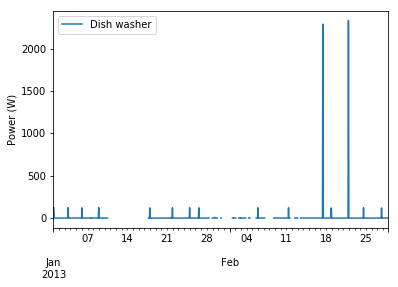

In [6]:
dish.plot()

In [7]:
dish.dropout_rate()

C:\ProgramData\Anaconda2\envs\nilmtk-env\lib\site-packages\nilmtk\results.py:188: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  return self._data.convert_objects()


0.033921545156156474

In [8]:
good_sections=dish.good_sections(full_results=True)
#if full_results is True then return nilmtk.stats.GoodSectionsResultsobject otherwise return list of TimeFrame objects.
#good_sections函数返回的是一个nilmtk.stats.goodsectionsresults

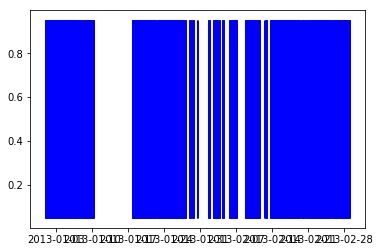

In [9]:
good_sections.plot()

In [10]:
#这块代码将good_sections函数得到的某个电气正常测量区间由pd.Timestamp转换成unix时间戳，保存进一个二维数组，并且存入文件，之后在python3中
#tf用。


In [11]:
timegroup=good_sections.combined()
#timegroup[0].start
#large gaps appearing because the entire system is down
#combined函数返回的是：Returns:	sections : TimeFrameGroup (a subclass of Python’s list class)
#数组中的每个_start,_end都是pd.timestamp

startarray=[]
endarray=[]
for i in timegroup:
    startarray.append(int(i.start.value//10**9))
    endarray.append(int(i.end.value//10**9))

#int(timegroup[0].start.value//10**9)

In [12]:
series=dish.activation_series(1800,1800,1,10)
#返回的是一个pandas里的数据结构Series，类似数组，带有索引
#border默认为1，其实就是论文里的On power threshold

C:\ProgramData\Anaconda2\envs\nilmtk-env\lib\site-packages\nilmtk\electric.py:764: DeprecationWarning: `activation_series()` is deprecated.  Please use `get_activations()` instead!
  "  Please use `get_activations()` instead!", DeprecationWarning)
C:\ProgramData\Anaconda2\envs\nilmtk-env\lib\site-packages\nilmtk\utils.py:390: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill(limit=20)
  data = data.resample(**resample_kwargs)


In [13]:
train_elec.mains()

ElecMeter(instance=54, building=1, dataset='UK-DALE', site_meter, appliances=[Appliance(type='immersion heater', instance=1), Appliance(type='water pump', instance=1), Appliance(type='security alarm', instance=1), Appliance(type='fan', instance=2), Appliance(type='drill', instance=1), Appliance(type='laptop computer', instance=2)])

In [14]:
dict=good_sections.to_dict()
dict=dict['statistics']['good_sections']


In [15]:
dict[0]
#dict变量存的是所有剔除gap后的区间的字典，这样的方式获取到每一个区间。

{'end': '2013-01-07T11:08:53+00:00', 'start': '2013-01-01T00:00:02+00:00'}

In [16]:
def convert_to_timestamp(t):
    """
    Parameters
    ----------
    t : str or pd.Timestamp or datetime or None

    Returns
    -------
    pd.Timestamp or None
    """
    return None if t is None else pd.Timestamp(t)

In [17]:
convert_to_timestamp(dict[0]['start'])

Timestamp('2013-01-01 00:00:02+0000', tz='UTC')

In [39]:
actitime=[]
activalue=[]
#series[0].index[0].value

#int(series[0].index[0].value//10**9)


for i in series:
    t=0
    while t<len(i.index):
        actitime.append(int(i.index[t].value//10**9))
        activalue.append(i[t])
        t+=1
activalue
 



    


[1.0,
 1.0,
 26.0,
 24.0,
 24.0,
 24.0,
 24.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 23.0,
 130.0,
 123.0,
 123.0,
 123.0,
 123.0,
 123.0,
 123.0,
 122.0,
 122.0,
 122.0,
 122.0,
 122.0,
 122.0,
 122.0,
 123.0,
 122.0,
 122.0,
 122.0,
 122.0,
 122.0,
 123.0,
 123.0,
 122.0,
 122.0,
 122.0,
 123.0,
 122.0,
 122.0,
 123.0,
 123.0,
 123.0,
 123.0,
 122.0,
 122.0,
 122.0,
 122.0,
 123.0,
 123.0,
 123.0,
 123.0,
 123.0,
 123.0,
 123.0,
 123.0,
 123.0,
 123.0,
 123.0,
 123.0,
 123.0,
 123.0,
 122.0,
 123.0,
 123.0,
 122.0,
 123.0,
 122.0,
 123.0,
 123.0,
 123.0,
 123.0,
 123.0,
 123.0,
 123.0,
 123.0,
 123.0,
 123.0,
 123.0,
 123.0,
 123.0,
 123.0,
 122.0,
 122.0,
 123.0,
 123.0,
 123.0,
 122.0,
 122.0,
 123.0,
 123.0,
 123.0,
 123.0,
 123.0,
 123.0,
 122.0,
 123.0,
 123.0,
 124.0,
 122.0,
 122.0,
 122.0,
 123.0,
 122.0,
 123.0,
 123.0,
 124.0,
 123.0,
 123.0,
 123.0,
 123.0,
 124.0,
 123.0,
 123.0,
 124.0,
 123.0,
 123.0,
 123.0,
 123.0,
 123.0,
 123.0,
 123.0,
 123.0